# Peer-graded Assignment: Running a Chi-Square Test of Independence

## Discussions

The second assignment deals with the Chi-Square Test of Independence. A Chi-Square Test of Independence compares frequencies of one categorical variable for different values of a second categorical variable. The null hypothesis is that the relative proportions of one variable are independent of the second variable; in other words, the proportions of one variable are the same for different values of the second variable. The alternate hypothesis is that the relative proportions of one variable are associated with the second variable. Note that if your research question only includes quantitative variables, you can categorize those just to get some practice with the tool.
Review criteria

## Run a Chi-Square Test of Independence.

You will need to analyze and interpret post hoc paired comparisons in instances where your original statistical test was significant, and you were examining more than two groups (i.e. more than two levels of a categorical, explanatory variable).

Note: although it is possible to run large Chi-Square tables (e.g. 5 x 5, 4 x 6, etc.), the test is really only interpretable when your response variable has only 2 levels (see Graphing decisions flow chart in Bivariate Graphing chapter).

## WHAT TO SUBMIT:

Following completion of the steps described above, create a blog entry where you submit syntax used to run a Chi-Square Test (copied and pasted from your program) along with corresponding output and a few sentences of interpretation.
Instructions


Your assessment will be based on the evidence you provide that you have completed all of the steps. In all cases, consider that the peer assessing your work is likely not an expert in the field you are analyzing. 

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data_from = pd.read_csv('../../datasets/ool_pds.csv', low_memory=False)

In [4]:
data_from.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Columns: 436 entries, CASEID to PPNET
dtypes: float64(3), int64(238), object(195)
memory usage: 7.6+ MB


# Extracted data

** There are a lot to be explored but here we only inspect race and dating.**

PPAGE: Age

PPSTATEN: State

PPETHM: 

    Race / Ethnicity
    1: white 
    2: black 
    3: other 
    4: hispanic 
    5: 2+ races

PPEDUCAT: 

    Education (Categorical)
    1: Less than high school 
    2: High School 
    3: Some College 
    4: Bachelor's degree or higher
    
PPEDUC: Education (Highest Degree Received)
    Education (Highest Degree Received)
    Value Label Unweighted
    Frequency

    1 No formal education 6 0.3 %
    2 1st, 2nd, 3rd, or 4th grade 1 0.0 %
    3 5th or 6th grade 4 0.2 %
    4 7th or 8th grade 22 1.0 %
    5 9th grade 19 0.8 %
    6 10th grade 35 1.5 %
    7 11th grade 53 2.3 %
    8 12th grade NO DIPLOMA 79 3.4 %
    9 HIGH SCHOOL GRADUATE - high school DIPLOMA or the equivalent (GED) 700 30.5 %
    10 Some college, no degree 490 21.4 %
    11 Associate degree 192 8.4 %
    12 Bachelors degree 414 18.0 %
    13 Masters degree 215 9.4 %
    14 Professional or Doctorate degree 64 2.8 %
    Total 2,294 100%

PPGENDER: 

    Gender
    1: Male 2: Female
    
PPNET: HH Internet Access
    0: No
    1: Yes

W2_QK3: If you could choose between the following two approaches, which one do you think
    is the better penalty for murder-the death penalty, or life imprisonment?

    Value Label Unweighted
    Frequency %
    1 Death penalty 744 32.4 %
    2 Life imprisonment 791 34.5 %
    Missing Data
    -1 REFUSED 66 2.9 %


W2_QL2A: [Work with children ] Gays and lesbians should be allowed to:

    1 Strongly Agree 447 19.5 %
    2 Somewhat Agree 541 23.6 %
    3 Somewhat Disagree 305 13.3 %
    4 Strongly Disagree 237 10.3 %
    -1 REFUSED 71 3.1 %

W2_QL2C: [Have and Raise Children ] Gays and lesbians should be allowed to:

    1 Strongly Agree 427 18.6 %
    2 Somewhat Agree 477 20.8 %
    3 Somewhat Disagree 310 13.5 %
    4 Strongly Disagree 320 13.9 %
    -1 REFUSED 79 3.4 %
    
    
W1_F5_A: [To own a home ] For your children or the children of people like yourself, how easy
or hard will it be for your children to reach these goals in the future?

    1 Very hard 507 22.1 %
    2 Somewhat hard 940 41.0 %
    3 Somewhat easy 578 25.2 %
    4 Very easy 185 8.1 %
    -1 Refused 84 3.7 %

W1_E1: Which of the following most characterizes your relationship status at this time?

    1 In a relationship or married and not dating 1398 60.9 %
    2 Dating and looking for serious relationship and/or marital partner 168 7.3 %
    3 Casual dating that is not serious only 119 5.2 %
    4 Friends with benefits 66 2.9 %
    5 One-night stands 14 0.6 %
    6 Not interested in dating or pursuing a relationship at this time 492 21.4 %

W1_E4: Were you ever willing to date outside of your racial group?

    1 Yes 671 29.3 %
    2 No 603 26.3 %

W1_A5A: Who did you vote for?

    1 John McCain 389 17.0 %
    2 Barack Obama 1338 58.3 %
    3 Other, please specify: 26 1.1 %

W1_A5B: Who would you have voted for?

    1 John McCain 70 3.1 %
    2 Barack Obama 283 12.3 %
    3 Other, please specify: 13 0.6 %
    4 No one/Refused to vote for a candidate 133 5.8 %

W1_N1A How would you rate people on welfare?

W1_N1B How would you rate American Indians or Native Americans?

W1_N1C: How would you rate Latinos?

W1_N1D: How would you rate Whites?

W1_N1E: How would you rate Blacks?

W1_N1F: How would you rate Asians?

W1_N1G: How would you rate gays/lesbians?

W1_N1H: How would you rate unionized workers?

W1_N1I: How would you rate Congress?

W1_N1J: How would you rate the wealthiest 1%?

W1_N1K: How would you rate the unemployed?

W1_N1L: How would you rate unmarried mothers?

W1_N1M: How would you rate undocumented immigrants?

W1_N1N: How would you rate public school teachers?

W1_P20 Which of the following income groups includes YOUR personal annual income (Do 
not include the income of other members of your household)? 

```
    1 Less than $5,000
    2 $5,000 to $7,499
    3 $7,500 to $9,999
    4 $10,000 to $12,499
    5 $12,500 to $14,999
    6 $15,000 to $19,999
    7 $20,000 to $24,999
    8 $25,000 to $29,999
    9 $30,000 to $34,999
    10 $35,000 to $39,999
    11 $40,000 to $49,999
    12 $50,000 to $59,999
    13 $60,000 to $74,999
    14 $75,000 to $84,999
    15 $85,000 to $99,999
    16 $100,000 to $124,999
    17 $125,000 to $149,999
    18 $150,000 to $174,999
    19 $175,000 or more
```

In [5]:
data_from[['PPAGE', 'PPGENDER', 'PPETHM', 'PPEDUCAT', 'W1_P20', 'W1_E1', 'W1_E4']].head()

,PPAGE,PPGENDER,PPETHM,PPEDUCAT,W1_P20,W1_E1,W1_E4
0,56,2,4,2,11,1,
1,59,1,2,1,4,1,2
2,36,1,2,4,16,1,2
3,70,1,2,4,6,6,
4,37,2,1,4,13,3,2


In [6]:
data = data_from[['PPAGE', 'PPGENDER', 'PPETHM', 'PPEDUCAT', 'W1_P20', 'W1_E1', 'W1_E4']].copy()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 7 columns):
PPAGE       2294 non-null int64
PPGENDER    2294 non-null int64
PPETHM      2294 non-null int64
PPEDUCAT    2294 non-null int64
W1_P20      2294 non-null int64
W1_E1       2294 non-null int64
W1_E4       2294 non-null object
dtypes: int64(6), object(1)
memory usage: 125.5+ KB


In [8]:
data['W1_E4'] = pd.to_numeric(data['W1_E4'], errors='coerce')

In [9]:
data.columns = ['age', 'gender', 'race', 'edu', 'income', 'relationship', 'dateout']
data.head()

,age,gender,race,edu,income,relationship,dateout
0,56,2,4,2,11,1,NaN
1,59,1,2,1,4,1,2.0
2,36,1,2,4,16,1,2.0
3,70,1,2,4,6,6,NaN
4,37,2,1,4,13,3,2.0


In [10]:
# data['gender'] = data['gender'].map({1: 'Male', 2: 'Female'})

# race_labels = {1: 'white',  2: 'black', 3: 'other', 4: 'hispanic', 5: 'two or more'}
# data['race'] = data['race'].map(race_labels)

# edu_labels = {1: 'Less than high school', 2: 'High school', 3: 'Some college', 4: "Bachelor's degree or higher"}
# data['edu'] = data['edu'].map(edu_labels)

# data['dateout'] = data['dateout'].map({'1': 'yes', '2': 'no'})

# rel_labels = {1: 'ongoing', 2: 'serious dating', 3: 'casual dating', 
#               4: 'friend with benefits', 5: 'one-night stands', 6: 'not dating now'}
# data['relationship'] = data['relationship'].map(rel_labels)

# def income_num_to_cat(number):
#     income_labels = '''
#     1 Less than $5,000
#     2 $5,000 to $7,499
#     3 $7,500 to $9,999
#     4 $10,000 to $12,499
#     5 $12,500 to $14,999
#     6 $15,000 to $19,999
#     7 $20,000 to $24,999
#     8 $25,000 to $29,999
#     9 $30,000 to $34,999
#     10 $35,000 to $39,999
#     11 $40,000 to $49,999
#     12 $50,000 to $59,999
#     13 $60,000 to $74,999
#     14 $75,000 to $84,999
#     15 $85,000 to $99,999
#     16 $100,000 to $124,999
#     17 $125,000 to $149,999
#     18 $150,000 to $174,999
#     19 $175,000 or more
#     '''
#     incomes = [i.strip() for i in income_labels.splitlines() if i.strip() != '']  # get 19 income levels
#     incomes = [i[2:].strip() for i in incomes]  # remove numbering
#     incomes = [i.replace('$', '') for i in incomes]  # remove numbering
#     return incomes[number-1]

# data['income'] = data['income'].apply(income_num_to_cat)

In [11]:
data.head(10)

,age,gender,race,edu,income,relationship,dateout
0,56,2,4,2,11,1,NaN
1,59,1,2,1,4,1,2.0
2,36,1,2,4,16,1,2.0
3,70,1,2,4,6,6,NaN
4,37,2,1,4,13,3,2.0
5,18,1,1,1,1,6,2.0
6,52,1,2,4,12,1,1.0
7,22,2,1,2,3,1,2.0
8,35,2,1,4,10,1,NaN
9,45,1,1,3,16,1,NaN


In [12]:
data['race'].value_counts()

2    1278
1     814
4     123
3      46
5      33
Name: race, dtype: int64

In [13]:
data['dateout'].value_counts()

 1.0    671
 2.0    603
-1.0     23
Name: dateout, dtype: int64

In [14]:
df = data.dropna()
df = df[df['dateout'] != -1.0]
df['dateout'].value_counts()

1.0    671
2.0    603
Name: dateout, dtype: int64

In [15]:
race_labels = {1: 'white',  2: 'black', 3: 'other', 4: 'hispanic', 5: 'two or more'}
df['race'] = df['race'].map(race_labels)

# this won't work with crosstab 
#df['dateout'] = df['dateout'].map({1: 'yes', 2: 'no'})

df['dateout'] = df['dateout'].map({1: 1, 2: 0})

In [16]:
ct=pd.crosstab(df['dateout'], df['race'])
ct

race,black,hispanic,other,two or more,white
dateout,,,,,
0,226,27,8,7,335
1,371,22,8,6,264


In [17]:
colsum=ct.sum(axis=0)
colpct=ct/colsum
colpct

race,black,hispanic,other,two or more,white
dateout,,,,,
0,0.378559,0.55102,0.5,0.538462,0.559265
1,0.621441,0.44898,0.5,0.461538,0.440735


In [18]:
df.dtypes

age              int64
gender           int64
race            object
edu              int64
income           int64
relationship     int64
dateout          int64
dtype: object

In [19]:
df['race'] = df['race'].astype('category')
df.dtypes

age                int64
gender             int64
race            category
edu                int64
income             int64
relationship       int64
dateout            int64
dtype: object

Text(0.5,1,'population of each race')

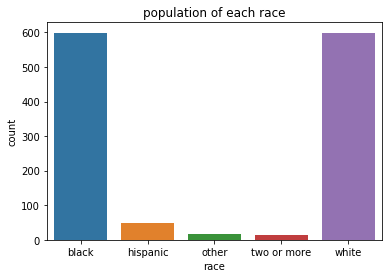

In [20]:
sns.countplot(x='race', data=df)
plt.title('population of each race')
# plt.xlabel('Race')
# plt.ylabel("Date someone outside one's racial group ")

Text(0.5,1,'dating outside races')

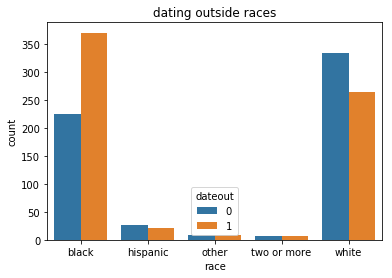

In [21]:
sns.countplot(x='race', hue='dateout', data=df)
plt.title('dating outside races')

Text(0.5,1,'percentage of dating outside races')

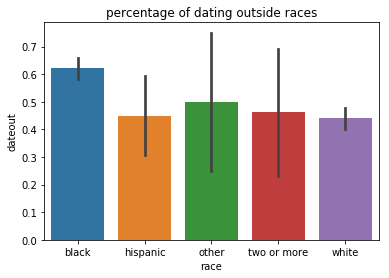

In [22]:
sns.barplot(x='race', y='dateout', data=df)
plt.title('percentage of dating outside races')

# Post hoc tests for Chi Square tests of independence

## bonferroni adjustment

$ \frac{p}{c} $

c: number of comparisons

5 groups will have 15 comparisions: 5 * 4 /2

bonferroni adjustment for p = 0.05/10

In [23]:
p_adjust = .05 / 10  # only one side p
p_adjust

0.005

# Chi Square Test

p value is smaller than adjusted p (0.005)

In [24]:
cs= scipy.stats.chi2_contingency(ct)
cs

(40.707032816899769,
 3.0906479595905409e-08,
 4,
 array([[ 282.56750392,   23.19230769,    7.57299843,    6.15306122,
          283.51412873],
        [ 314.43249608,   25.80769231,    8.42700157,    6.84693878,
          315.48587127]]))

## Post Hoc Test

In [25]:
races = list(df['race'].unique())
races

['black', 'white', 'hispanic', 'other', 'two or more']

In [26]:
from itertools import combinations

races_diff = []
for r1, r2 in combinations(races, 2):
    print(f'Post Hoc Test for races: "{r1}" and "{r2}"')
    dfr = df[(df['race'] == r1) | (df['race'] == r2)]
    ct = pd.crosstab(dfr['dateout'], dfr['race'])
    print(ct[[r1, r2]])
    colsum=ct[[r1, r2]].sum(axis=0)
    colpct=ct[[r1, r2]]/colsum
    print(colpct)
    chi2, p, dof, ex = scipy.stats.chi2_contingency(ct[[r1, r2]])
    print(f'chi2 = {chi2}, p = {p}')
    print(ex)
    print('-'*50)
    if p < p_adjust:
        races_diff.append((r1, r2))
print('\n')
print('Significant difference for the race pair that do not date outside their own race')
print(races_diff)


Post Hoc Test for races: "black" and "white"
race     black  white
dateout              
0          226    335
1          371    264
race        black     white
dateout                    
0        0.378559  0.559265
1        0.621441  0.440735
chi2 = 38.482695170235495, p = 5.524133365740496e-10
[[ 280.03093645  280.96906355]
 [ 316.96906355  318.03093645]]
--------------------------------------------------
Post Hoc Test for races: "black" and "hispanic"
race     black  hispanic
dateout                 
0          226        27
1          371        22
race        black  hispanic
dateout                    
0        0.378559   0.55102
1        0.621441   0.44898
chi2 = 4.952232212604054, p = 0.026057003924525795
[[ 233.80959752   19.19040248]
 [ 363.19040248   29.80959752]]
--------------------------------------------------
Post Hoc Test for races: "black" and "other"
race     black  other
dateout              
0          226      8
1          371      8
race        black  other
dateo

# Model Interpretation for Chi-Square Tests:

When examining the association between race groups (categorical response) and willingness to date outside one's racial group (categorical explanatory), a chi-square test of independence revealed that among 5 racial groups (my sample), 
only black-white shows a difference.

The df or degree of freedom we record is the number of levels of the explanatory variable -1. Here the df is 1; willingness to  which has 2 levels (df 2-1=1).

# Model Interpretation for post hoc Chi-Square Test results:

A Chi Square test of independence revealed that among racial groups and willingness to date outside one's racial group (binary categorical variable) were significantly associated, X2 =40.71, 4 df, p=3.09e-08.


Post hoc comparisons of rates of "willingness of dating outside racial groups" by pairs of races shows a significant difference in the "white vs black" group.

# Conclusion:

According to the post hoc test, we can only be confident that the "white vs black" race group have a difference when dating outside one's own race. That is, black people are more likely to date someone outside their racial group compared to white people. 

Some race groups have very small samples so it may contibute to the high p-value of the Chi Square Test.